# Multiple Regression Analysis Notebook

This notebook performs multiple regression analysis on fields in a dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

## Step 1: Load the file and clean the data

In [4]:
# Replace 'your_dataset.csv' with the path to your dataset
file_path = 'datasets/Student_Performance_Data(SPD24).xlsx'
data = pd.read_excel(file_path)
data.head()

,Student ID,Gender,Age,Grade Level,Attendance Rate,Study Hours,Parental Education Level,Parental Involvement,Extracurricular Activities,Socioeconomic Status,...,Bullying Incidents,Special Education Services,Counseling Services,Learning Disabilities,Behavioral Issues,Attendance of Tutoring Sessions,School Climate,Parental Employment Status,Household Size,Performance Score
0,1,Male,15,12,80.487800,2.764496,Bachelor's,High,Yes,High,...,1,No,Yes,Yes,Yes,No,Negative,Unemployed,3,Low
1,2,Female,17,12,96.242678,4.534785,Bachelor's,High,Yes,Low,...,3,Yes,Yes,No,Yes,No,Negative,Employed,3,Medium
2,3,Male,14,9,84.649681,2.008148,Bachelor's,Medium,Yes,Low,...,0,Yes,No,Yes,No,No,Neutral,Employed,3,High
3,4,Male,14,10,86.158599,3.698293,High School,High,No,Low,...,3,Yes,No,No,Yes,No,Positive,Employed,4,Medium
4,5,Male,15,10,88.487638,3.408604,Associate,Low,No,Middle,...,1,Yes,Yes,No,No,No,Positive,Employed,6,Low


## Step 2: Specify variables and perform Cross-Validation

In [5]:
# Select features and target (modify column names as needed)
features = ['Attendance Rate', 'Study Hours', 'Previous Academic Performance', 'Hours of Sleep', 'Homework Completion Rate']  # Replace with actual feature column names
target = 'Reading Proficiency'  # Replace with the target variable name

X = data[features]
y = data[target]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Lasso with Cross-Validation to find the best alpha
lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 50), cv=10, random_state=42)
lasso_cv.fit(X_train, y_train)

# Best alpha
best_alpha = lasso_cv.alpha_
print(f"Best alpha: {best_alpha:.5f}")

Best alpha: 10.00000


## Step 3: Run Lasso Regression

In [6]:
# Train final Lasso model with best alpha
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)

# Predictions
y_pred = lasso.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.5f}")
print(f"R-squared (R²): {r2:.5f}")

# Coefficients
coef_df = pd.DataFrame({'Feature': ['Intercept'] + features, 'Coefficient': [lasso.intercept_] + list(lasso.coef_)})
print("\nLasso Coefficients:")
print(coef_df)

Mean Squared Error (MSE): 134.71646
R-squared (R²): -0.00002

Lasso Coefficients:
                         Feature  Coefficient
0                      Intercept    79.950515
1                Attendance Rate     0.000000
2                    Study Hours     0.000000
3  Previous Academic Performance    -0.000000
4                 Hours of Sleep    -0.000000
5       Homework Completion Rate     0.000000


## Step 4: Plot feature importance

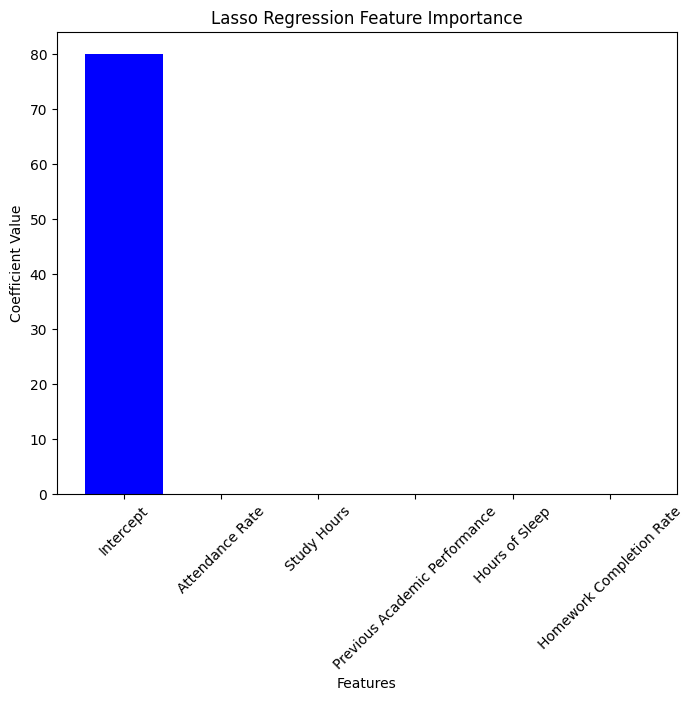

In [7]:
# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(coef_df['Feature'], coef_df['Coefficient'], color='blue')
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Lasso Regression Feature Importance")
plt.xticks(rotation=45)
plt.show()